## Time Series Analysis and Prediction Methods

### Series Data Analysis
Assuming prediction on log return prices only. Read data and plot log returns.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# load pickle file
log_pr = pd.read_pickle("./log_price.df")
log_ret = (log_pr.shift(-1) - log_pr).dropna()
log_period_ret = (log_pr.shift(-30) - log_pr).dropna()

<AxesSubplot:xlabel='timestamp'>

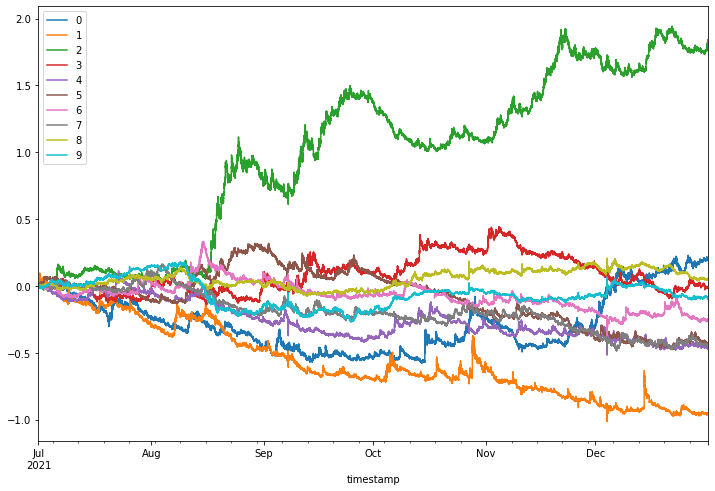

In [4]:
# check the log prices and log returns of the 10 assets
import matplotlib.pyplot as plt

log_pr.plot(figsize=(12, 8))

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

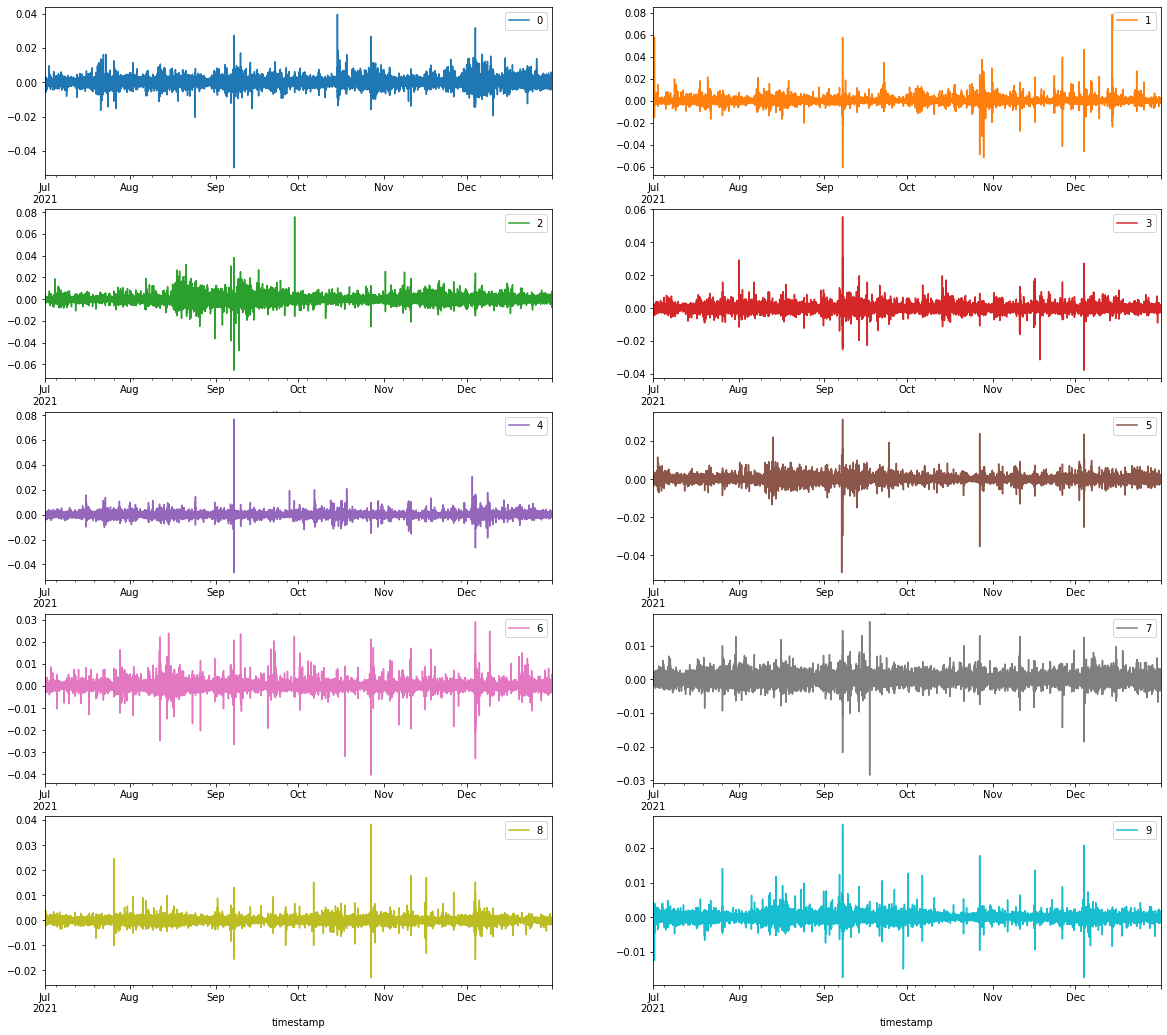

In [5]:
# check the log returns
_, ax_ret = plt.subplots(5, 2, figsize=(20, 18))
log_ret.plot(subplots=True, ax=ax_ret) 

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

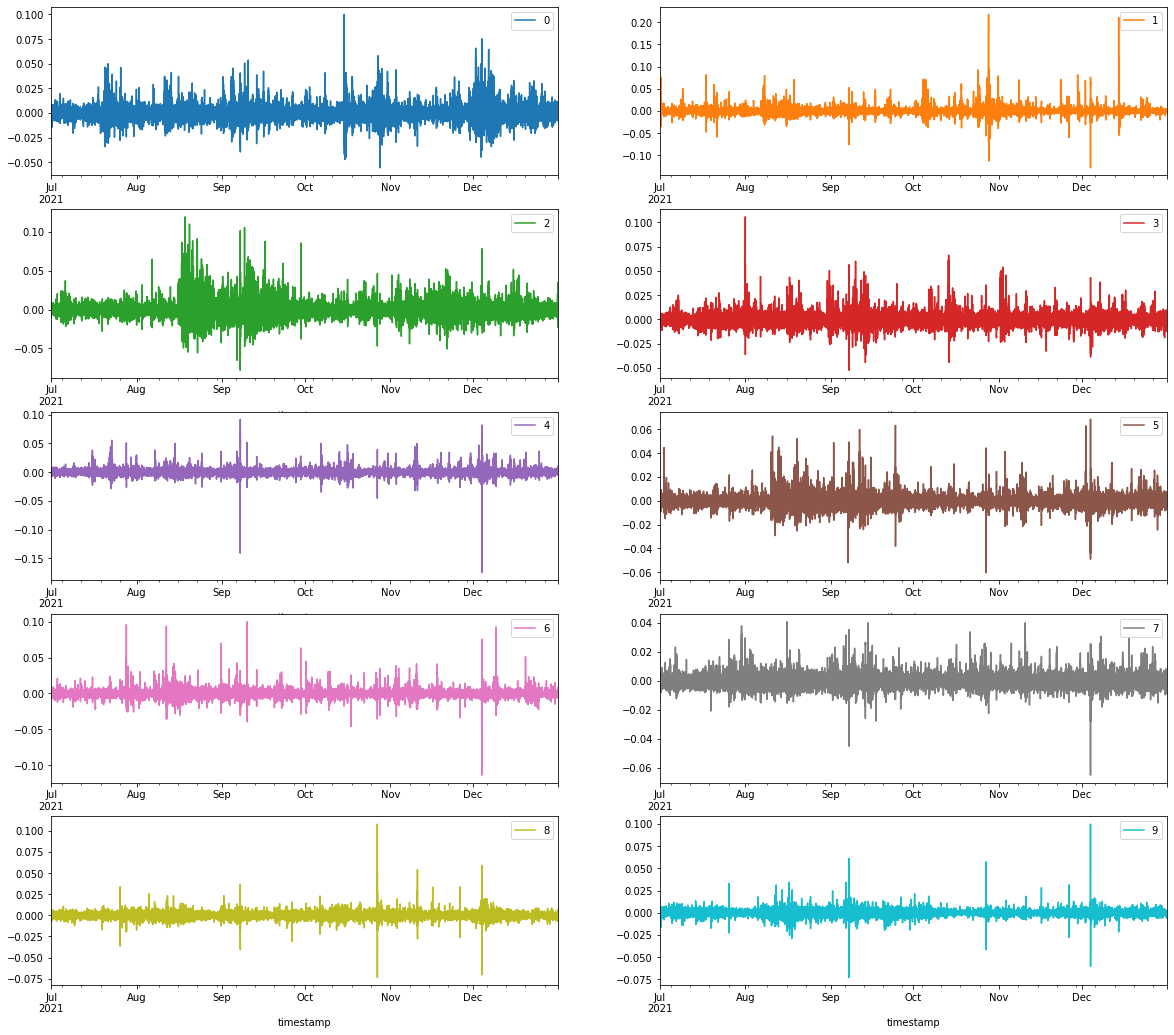

In [6]:
# check the periodic log returns

_, ax_ret_period = plt.subplots(5, 2, figsize=(20, 18))
log_period_ret.plot(subplots=True, ax=ax_ret_period) 

By observation, extreme returns may happen at near periods; volatility shows ``pseudo'' periodic clustering. 

We bring in the assumption from courses in Princeton Finance 504: random walk(brownian motion), volatility, heavy tails.

### Distribution Test

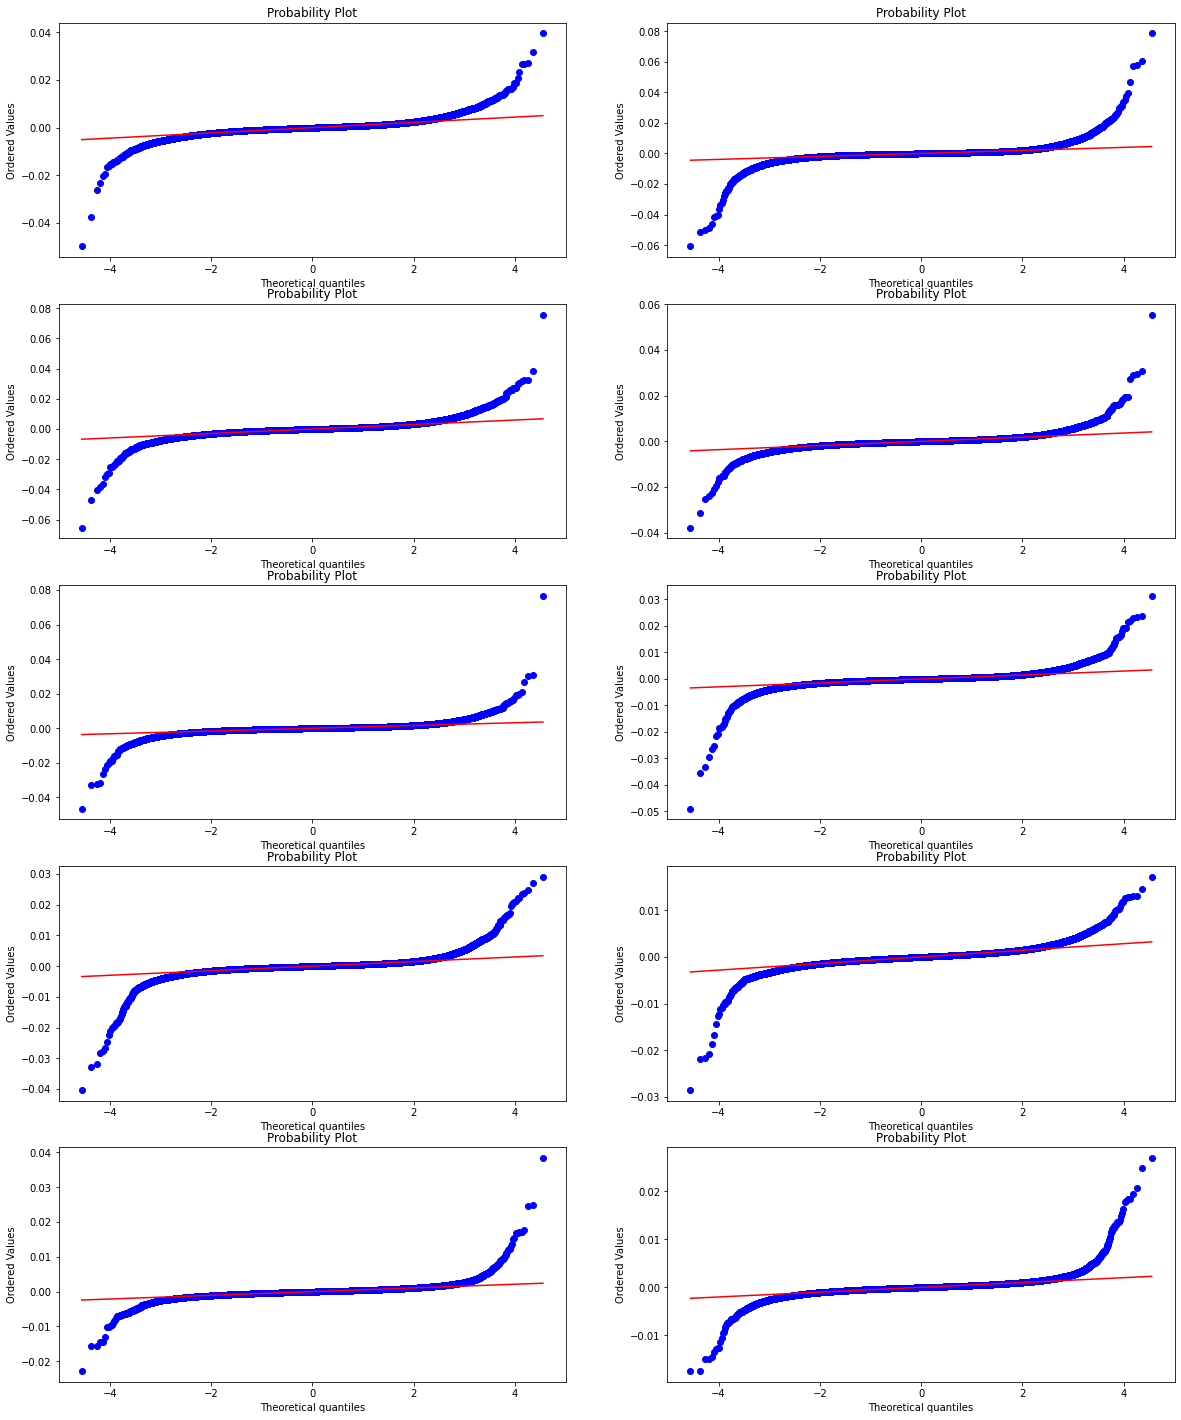

In [17]:
# compare with normal distribution
import scipy.stats as stats
rng = np.random.default_rng()

_, ax = plt.subplots(5, 2, figsize=(20, 25))
for i in range(10):
    stats.probplot(log_ret[i], plot=ax.ravel()[i])
plt.show()

The log return data doesn't align quite well with normal distribution. There are some heavy tail behaviors.

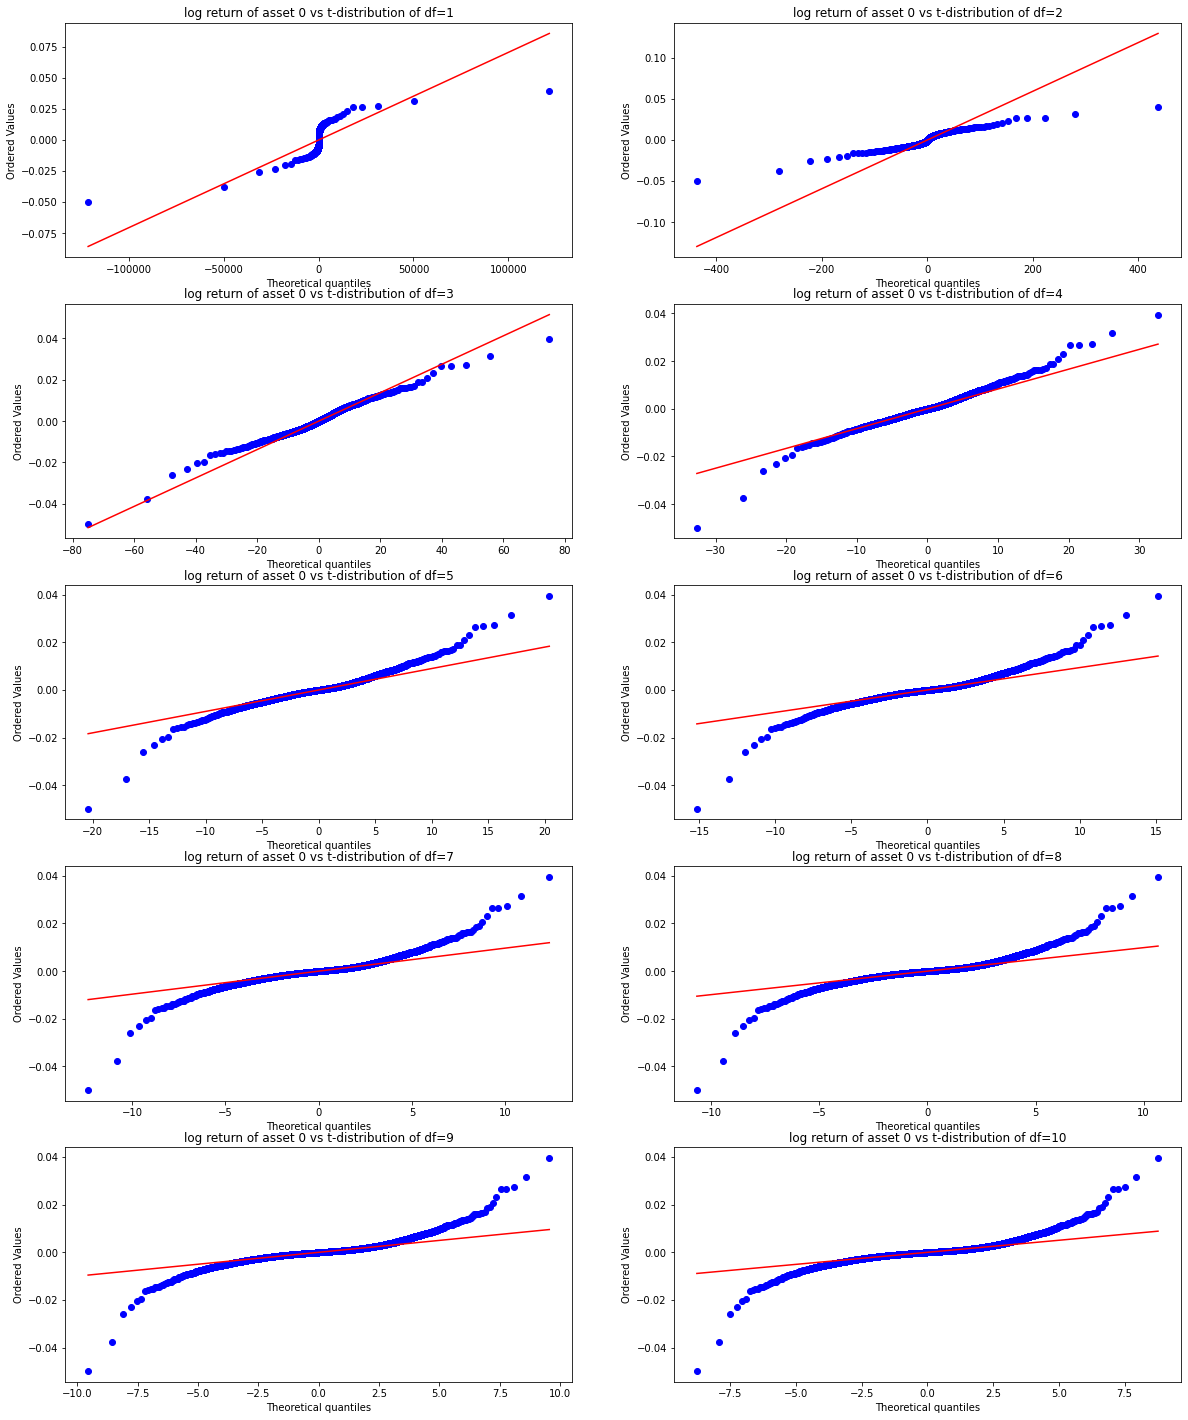

In [26]:
_, ax = plt.subplots(5, 2, figsize=(20, 25))
for i in range(10):
    stats.probplot(log_ret[0], dist=stats.t, sparams=(i+1), plot=ax.ravel()[i])
    ax.ravel()[i].set_title("log return of asset 0 vs t-distribution of df=%d" % (i+1))
plt.show()

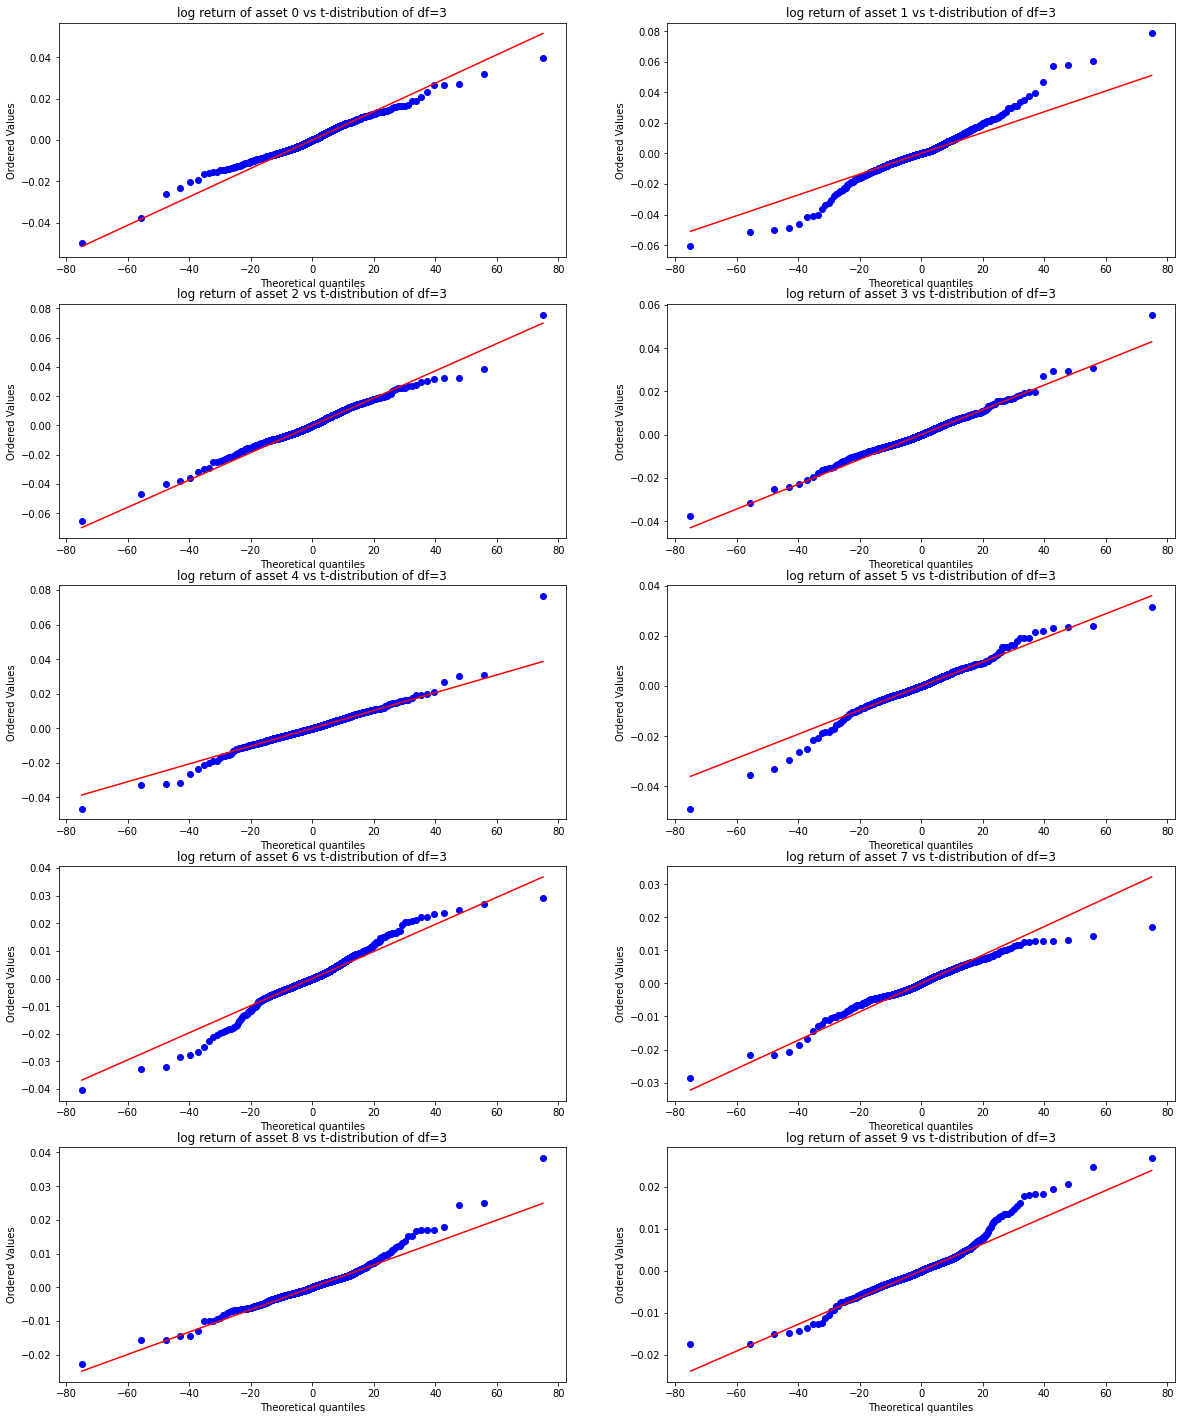

In [27]:
_, ax = plt.subplots(5, 2, figsize=(20, 25))
for i in range(10):
    stats.probplot(log_ret[i], dist=stats.t, sparams=(3), plot=ax.ravel()[i])
    ax.ravel()[i].set_title("log return of asset %d vs t-distribution of df=3" % (i))
plt.show()

We claim that the distribution of the data is most likely t-distribution of degrees of freedom 3.

### Test on stationarity (white noise or correlated)

In [37]:
def autocorrelation(log_ret):
    max_shift = 30
    auto_corr = np.zeros((max_shift, 10, 10))
    for sh in range(1, max_shift + 1):
        shifted = log_ret.shift(-sh).iloc[:-sh]
        combined = pd.concat([shifted, log_ret], axis=1).dropna()
        auto_corr[sh - 1] = combined.corr().values[10:, :10]
    return auto_corr

auto_corr = autocorrelation(log_ret)
print(len(auto_corr))  # auto_corr[row, col] means the auto-correlation between original col with shifted row

30


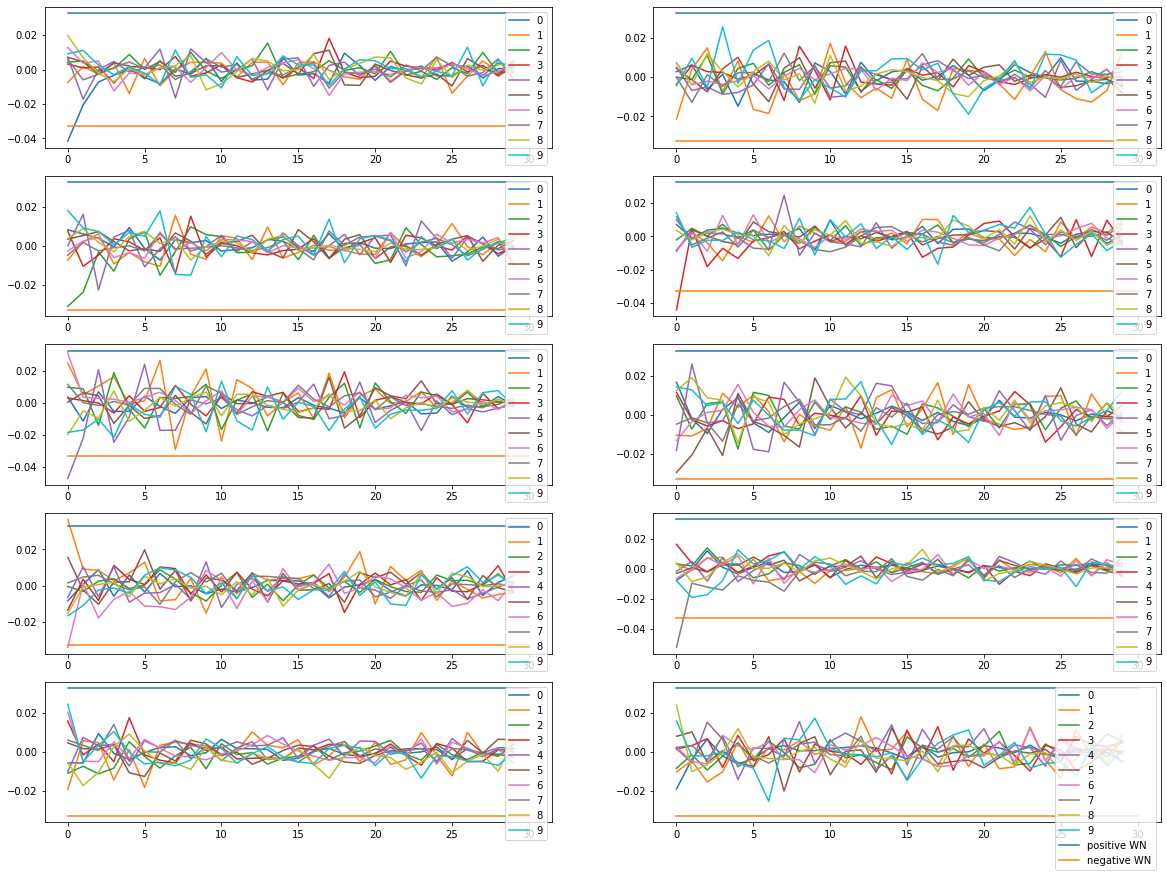

In [52]:
_, ax = plt.subplots(5, 2, figsize=(20, 15))

for i in range(10):
    auto_corr_i = pd.DataFrame(auto_corr[:,:,i], columns=np.arange(10))
    auto_corr_i.plot(ax=ax.ravel()[i])

    x = np.linspace(0, 30)
    ax.ravel()[i].plot(x, 1.96/(2*np.ones(len(x))*30), label="positive WN")
    ax.ravel()[i].plot(x, -1.96/(2*np.ones(len(x))*30), label="negative WN")

plt.legend()

### ARIMA model

In [6]:
import dataset
dataset = dataset.DataSet()
log_pr_train = dataset.train_set[0]
log_pr_test = dataset.test_set[0]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller


In [2]:
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 MB 39.5 MB/s eta 0:00:0000:0100:01


In [7]:
result = adfuller(dataset.train_set_log_return(1))
print("p-value", result)

TypeError: 'DataFrame' object is not callable

In [ ]:
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/